# Task: Predict which customer group is worth targeting

The goal of this task is to determine which group of customers are worth targeting given the following dataset. The data is highly ananomized so there isn't a good possibility to apply domain expertise. My intial goal for this task were to try out the stacked classifier from SK learn (new in version 0.22.1).

Thanks to:
* Thanisis https://www.kaggle.com/tsiaras for the dataset https://www.kaggle.com/tsiaras/predicting-profitable-customer-segments and also for the task

In [1]:
pip install --upgrade scikit-learn

     |████████████████████████████████| 7.1MB 4.7MB/s 
ERROR: allennlp 0.9.0 requires flaky, which is not installed.
ERROR: allennlp 0.9.0 requires responses>=0.7, which is not installed.
ERROR: kmeans-smote 0.1.2 has requirement imbalanced-learn<0.5,>=0.4.0, but you'll have imbalanced-learn 0.6.1 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement numpy<1.16,>=1.13, but you'll have numpy 1.18.1 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement scikit-learn<0.21,>=0.19.0, but you'll have scikit-learn 0.22.1 which is incompatible.
ERROR: hypertools 0.6.2 has requirement scikit-learn<0.22,>=0.19.1, but you'll have scikit-learn 0.22.1 which is incompatible.
ERROR: allennlp 0.9.0 has requirement spacy<2.2,>=2.1.0, but you'll have spacy 2.2.3 which is incompatible.
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
Note: you may need to restart the kernel to use updated packa

In [2]:
import sklearn
print(sklearn.__version__)

0.22.1


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 100)

/kaggle/input/predicting-profitable-customer-segments/customerTargeting.csv


In [4]:
data = pd.read_csv('/kaggle/input/predicting-profitable-customer-segments/customerTargeting.csv')
data.head()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,g1_11,g1_12,g1_13,g1_14,g1_15,g1_16,g1_17,g1_18,g1_19,g1_20,g1_21,g2_1,g2_2,g2_3,g2_4,g2_5,g2_6,g2_7,g2_8,g2_9,g2_10,g2_11,g2_12,g2_13,g2_14,g2_15,g2_16,g2_17,g2_18,g2_19,g2_20,g2_21,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
0,4.50,1,3,4,5,1,1,4,6,0,-2,-2,2.505032,2.551406,6.240000,3.608000,0.744000,1.216000,0.003078,0.003028,0.578205,1.83,6,0,6,7,4,0,0,1,4,-1,3,2.888736,2.616855,5.552000,0.728000,0.160000,0.002994,0.002953,0.586149,3.50,1.97,-1,7,6,0,0,0,1,3.223605,1,-3,-2,0,1,4,2,1,-6,-5,-0.383704,-0.065449,0.584000,0.488000,0,-3.232000,-1.944000,-0.007944,1.76,2
1,2.20,24,22,46,10,24,28,18,22,-4,-4,-8,3.718983,3.882271,7.423435,5.048030,0.836178,1.975244,0.784882,0.019448,0.680013,2.80,34,14,48,10,25,16,16,24,9,-8,1,4.065822,4.042015,6.369385,1.511704,1.783791,0.784882,0.033373,0.498949,3.25,1.85,2,1,3,0,0,0,0,1.541039,10,-12,-2,0,12,2,-3,4,-13,-9,-0.346839,-0.159744,-0.947614,0.463540,0,-5.342174,-1.321355,0.181064,1.85,1
2,12.00,7,4,11,18,8,11,2,10,-3,-8,-11,2.244550,2.458087,11.091399,5.853005,0.730046,2.022004,0.043937,0.014264,0.527707,1.30,11,18,29,2,13,3,16,1,10,15,25,4.918483,4.050389,10.029408,2.489174,0.204741,0.022247,0.042004,0.567984,5.00,1.70,-5,10,5,0,0,0,1,2.049024,-11,-7,-18,7,-5,-1,-3,-18,-18,-36,-2.673934,-1.592303,0.525305,-0.467169,0,-6.566521,-4.176403,-0.040277,2.05,2
3,1.91,8,5,13,14,6,7,6,9,-1,-3,-4,2.580190,2.683092,9.864426,2.582357,0.656638,1.407549,0.041563,0.021386,0.261785,4.50,5,3,8,17,5,9,7,16,-4,-9,-13,1.964163,2.278147,3.369489,0.665585,2.163561,0.043937,0.010358,0.273886,3.60,1.98,-1,3,2,0,0,0,0,2.284503,5,0,5,-10,0,-3,4,8,1,9,0.616027,0.404945,-1.506923,0.741964,0,-2.438120,-0.787132,-0.012101,1.82,0
4,2.50,23,16,39,14,33,25,18,27,8,-9,-1,3.470617,3.055989,11.672962,4.554560,1.895740,1.237122,0.941241,0.000062,0.390180,3.00,29,23,52,8,31,22,21,23,9,-2,7,4.527831,4.215284,4.494986,1.419174,1.144728,0.364776,0.008148,0.347568,3.40,1.80,-3,2,-1,1,0,0,0,2.648418,0,-13,-13,10,4,-4,-4,10,-18,-8,-1.057214,-1.159294,0.751012,-0.182052,0,-1.259728,0.059574,0.042613,1.99,2


# Data:
The columns starting with 'g1_' represent info about the first group
the columns starting with 'g2_' represent infor about the second group
the columns with 'c_' are features representing a comparison of the two groups

'target' is the value we are trying to predict. A value of 0 indicates that neither group was profitable after the marketing campaign, a value of  1 indicates group 1 was more profitable and a value of 2 indicates that a value of 2 was more profitable

In [5]:
data.info() #no data missing and all values are already integers/floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6620 entries, 0 to 6619
Data columns (total 71 columns):
g1_1      6620 non-null float64
g1_2      6620 non-null int64
g1_3      6620 non-null int64
g1_4      6620 non-null int64
g1_5      6620 non-null int64
g1_6      6620 non-null int64
g1_7      6620 non-null int64
g1_8      6620 non-null int64
g1_9      6620 non-null int64
g1_10     6620 non-null int64
g1_11     6620 non-null int64
g1_12     6620 non-null int64
g1_13     6620 non-null float64
g1_14     6620 non-null float64
g1_15     6620 non-null float64
g1_16     6620 non-null float64
g1_17     6620 non-null float64
g1_18     6620 non-null float64
g1_19     6620 non-null float64
g1_20     6620 non-null float64
g1_21     6620 non-null float64
g2_1      6620 non-null float64
g2_2      6620 non-null int64
g2_3      6620 non-null int64
g2_4      6620 non-null int64
g2_5      6620 non-null int64
g2_6      6620 non-null int64
g2_7      6620 non-null int64
g2_8      6620 non-null int64
g

In [6]:
data.describe()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,g1_11,g1_12,g1_13,g1_14,g1_15,g1_16,g1_17,g1_18,g1_19,g1_20,g1_21,g2_1,g2_2,g2_3,g2_4,g2_5,g2_6,g2_7,g2_8,g2_9,g2_10,g2_11,g2_12,g2_13,g2_14,g2_15,g2_16,g2_17,g2_18,g2_19,g2_20,g2_21,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
count,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.00000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.00000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000
mean,2.708779,14.424018,10.485650,24.909668,10.988066,13.412085,10.161027,10.745468,14.169033,3.251057,-3.423565,-0.172508,3.154143,3.043544,10.268756,4.736862,1.121263,1.159848,0.205070,0.058852,0.449405,4.809875,15.113897,10.018580,25.132477,11.025076,14.040634,10.633837,10.253323,13.500453,3.406798,-3.247130,0.159668,3.183453,3.050268,4.840590,1.151021,1.125410,0.205567,0.058207,0.448996,3.899359,1.88984,1.563595,1.558761,3.122356,0.183686,0.200906,0.183686,0.200906,1.945808,4.405438,-4.628248,-0.222810,-0.088369,-0.092296,0.111631,0.128399,6.498187,-6.830363,-0.332175,-0.029311,-0.006724,-0.004147,0.008827,0.00000,-0.228426,-0.103728,0.000408,1.917134,1.031722
std,1.857725,10.700787,8.384203,18.174948,5.635985,10.090030,7.495039,7.964247,9.866734,8.481210,8.580752,15.036306,0.931224,0.825628,3.760524,2.127352,0.580622,0.566745,0.273416,0.151767,0.139392,3.937164,10.836923,8.251602,18.190664,5.666965,10.205415,7.563664,7.831935,9.722428,8.750434,8.313375,15.025919,0.928835,0.823931,2.150843,0.588387,0.552912,0.273798,0.151470,0.139194,1.093160,0.22708,4.063520,4.057417,3.939467,0.387257,0.400708,0.387257,0.400708,1.217214,8.497254,9.093944,14.470732,7.466654,6.378463,6.343190,7.420718,12.175872,12.973601,21.498095,1.220752,1.068199,0.663238,0.683422,0.32287,3.390902,1.944419,0.092761,0.302175,0.731042
min,1.050000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-27.000000,-38.000000,-65.000000,0.000000,0.172875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.950000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-27.000000,-36.000000,-63.000000,0.000000,0.216094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0.00000,-10.000000,-10.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000,-47.000000,-63.000000,-33.000000,-29.000000,-28.000000,-40.000000,-39.000000,-74.000000,-101.000000,-4.684111,-4.319826,-2.512919,-3.118836,-2.00000,-15.202740,-9.181722,-0.750000,0.000000,0.000000
25%,1.667000,6.000000,4.000000,10.000000,6.000000,5.000000,4.000000,4.000000,6.000000,-2.000000,-8.000000,-8.250000,2.499106,2.493665,8.512643,3.389698,0.735749,0.780218,0.011054,0.001827,0.348935,2.500000,6.000000,3.000000,11.000000,6.000000,6.000000,4.000000,4.000000,5.000000,-2.000000,-8.000000,-8.000000,2.500000,2.500000,3.470612,0.760000,0.758589,0.011054,0.001827,0.347931,3.250000,1.74000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.901358,0.000000,-9.000000,-7.000000,-4.000000,-3.000000,-3.000000,-3.000000,-1.000000,-13.000000,-10.000000,-0.716407,-0.531224,-0.440407,-0.406811,0.00000,-2.222226,-1.293471,-0.054331,1.710000,0.000000
50%,2.150000,13.000000,9.000000,22.000000,11.000000,12.000000,9.000000,9.000000,13.00000

In [7]:
corr_df = data.corr()
corr_df #unhide the output to see the full set of corrolation coeficients

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,g1_11,g1_12,g1_13,g1_14,g1_15,g1_16,g1_17,g1_18,g1_19,g1_20,g1_21,g2_1,g2_2,g2_3,g2_4,g2_5,g2_6,g2_7,g2_8,g2_9,g2_10,g2_11,g2_12,g2_13,g2_14,g2_15,g2_16,g2_17,g2_18,g2_19,g2_20,g2_21,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
g1_1,1.000000,-0.164910,-0.224802,-0.200795,0.343122,-0.161452,0.142321,-0.187718,0.137807,-0.317850,-0.332691,-0.369139,-0.355680,-0.335104,-0.160742,-0.204670,-0.246033,0.197164,0.151849,-0.205538,-0.111678,-0.498714,0.268808,0.338764,0.313809,-0.513904,0.296927,-0.212067,0.290203,-0.189205,0.529603,0.494671,0.582104,0.494726,0.472833,0.275241,0.429495,-0.295842,-0.260879,0.414706,0.038904,-0.012692,-0.039564,-0.513936,0.487751,-2.776497e-02,-0.113151,-0.307499,0.020954,0.596232,-1.728843e-02,-0.536644,-0.527586,-0.646674,0.028189,-0.189098,0.017179,-0.225120,-0.559150,-0.577249,-0.665042,-0.647745,-0.623716,0.031244,-0.206267,-1.408073e-01,-0.531982,-0.528387,-0.226197,0.039719,0.232350
g1_2,-0.164910,1.000000,0.811029,0.962898,-0.447685,0.942299,0.481965,0.832117,0.589023,0.695123,0.095032,0.446315,0.711466,0.744873,0.592000,0.548541,0.571613,0.121227,0.363899,0.604038,0.220114,0.255833,0.710945,0.625108,0.707099,-0.048506,0.693828,0.692240,0.675449,0.726653,0.210839,-0.213482,0.004671,0.331983,0.365496,0.395829,0.325963,0.344288,0.608078,0.275221,0.180270,0.225386,-0.189047,0.207659,-0.121401,8.916193e-02,0.042852,0.291564,0.011973,0.007894,2.108030e-04,0.652286,-0.099476,0.320510,0.327188,-0.263030,0.219340,-0.171017,0.629954,-0.079353,0.308899,0.290130,0.293806,0.213392,-0.180104,5.365474e-02,0.161989,0.162297,0.060257,0.188993,-0.042702
g1_3,-0.224802,0.811029,1.000000,0.938811,-0.546881,0.801764,0.409913,0.916102,0.359642,0.591603,0.436742,0.582928,0.785000,0.809446,0.610914,0.534238,0.616063,0.003147,0.181802,0.668464,0.170671,0.351754,0.578005,0.516839,0.578788,-0.013249,0.569085,0.610689,0.564909,0.626435,0.135845,-0.200417,-0.031774,0.259866,0.286181,0.306044,0.273326,0.318314,0.533379,0.192056,0.107437,0.304637,-0.244969,0.270429,-0.183089,9.037392e-02,0.061256,0.371991,0.006582,-0.013127,-3.726463e-03,0.519450,0.233166,0.451553,0.267771,-0.211966,0.422030,-0.304453,0.548926,0.197237,0.429923,0.401097,0.404894,0.273959,-0.232708,6.691703e-02,0.241096,0.245965,0.095251,0.260013,-0.062412
g1_4,-0.200795,0.962898,0.938811,1.000000,-0.515861,0.924652,0.472860,0.912525,0.512701,0.682174,0.257423,0.531683,0.781011,0.811958,0.630368,0.569409,0.620739,0.072826,0.298118,0.664003,0.208327,0.312892,0.685217,0.606463,0.683314,-0.034670,0.671025,0.689281,0.658277,0.716806,0.186801,-0.218144,-0.011908,0.315338,0.347209,0.374230,0.318003,0.349545,0.604066,0.250637,0.155698,0.273230,-0.224310,0.247013,-0.155937,9.418547e-02,0.053488,0.343265,0.010085,-0.001408,-1.594924e-03,0.623669,0.048993,0.397009,0.316161,-0.252644,0.323824,-0.241135,0.624118,0.044266,0.380195,0.355847,0.359763,0.252017,-0.213389,6.245927e-02,0.206593,0.209020,0.079417,0.231218,-0.053932
g1_5,0.343122,-0.447685,-0.546881,-0.515861,1.000000,-0.389234,0.291838,-0.427415,0.257780,-0.720973,-0.693119,-0.802206,-0.803623,-0.766503,-0.346051,-0.354177,-0.529817,0.427340,0.363613,-0.498348,-0.088258,-0.518289,-0.031130,-0.039931,-0.036659,0.002918,-0.028733,-0.055149,-0.044043,-0.048867,0.014160,0.015656,0.016908,-0.014174,-0.010968,-0.040034,-0.035769,-0.037717,-0.048692,0.001969,0.010491,-0.393744,0.335904,-0.416718,0.244035,-1.784996e-01,-0.092859,-0.544620,0.008480,0.005611,2.227139e-02,-0.525003,-0.467103,-0.601828,-0.462360,0.397005,-0.470883,0.382265,-0.512890,-0.467980,-0.572900,-0.602242,-0.583982,-0.432377,0.385178,-1.008755e-01,-0.331556,-0.343214,-0.148368,-0.333108,0.087913
g1_6,-0.161452,0.942299,0.801764,0.924652,-0.389234,1.000000,0.568947,0.835760,0.582784,0.686901,0.105588,0.447701,0.673488,0.709677,0.614604,0.566960,0.625895,0.180936,0.371308,0.594087,0.218762,0.277270,0.695317,0.

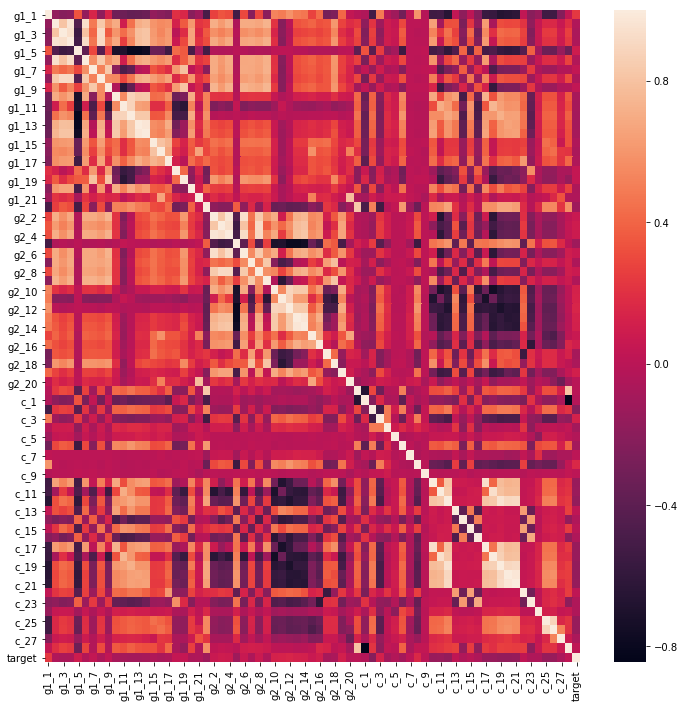

In [8]:
import matplotlib
import seaborn as sns
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 12))

sns.heatmap(corr_df)

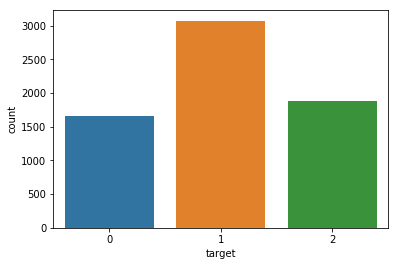

In [9]:
sns.countplot(data['target'])

In [10]:
data['target'].value_counts()

1    3076
2    1877
0    1667
Name: target, dtype: int64

In [11]:
def enc_0(num):
    if num == 0:
        return 1
    else:
        return 0

def enc_1(num):
    if num == 1:
        return 1
    else:
        return 0

def enc_2(num):
    if num == 2:
        return 1
    else:
        return 0

data['target_0'] = pd.Series([enc_0(x) for x in data.target], index=data.index)
data['target_1'] = pd.Series([enc_1(x) for x in data.target], index=data.index)
data['target_2'] = pd.Series([enc_2(x) for x in data.target], index=data.index)

## One hot encoding the outcomes didn't help any of the models I tried
## But there is one possibility with this I left unexplored, see my final thoughts for more details

In [12]:
corr_df = data.corr()
corr_df = corr_df.sort_values(by=['target'])
pd.DataFrame(corr_df['target'])

,target
target_0,-0.818817
c_2,-0.219371
c_12,-0.167140
c_19,-0.164224
c_20,-0.162834
c_21,-0.157163
c_26,-0.149233
c_25,-0.147813
c_10,-0.142526
c_17,-0.141143


I had experimented with removing c_15, c_9, and c_7, because of their really low corrolation coeficients. After testing I discovered they had a not insignifigant effect of the capture rate of 0 for the target.

In [13]:
# There are other methods of generating this in less code
# I just want my mistakes to be a little easier to spot
# the d_x refers to the delta between g1_x and g2_x
data['d_1'] = data['g1_1'] - data['g2_1']
data['d_2'] = data['g1_2'] - data['g2_2']
data['d_3'] = data['g1_3'] - data['g2_3']
data['d_4'] = data['g1_4'] - data['g2_4']
data['d_5'] = data['g1_5'] - data['g2_5']
data['d_6'] = data['g1_6'] - data['g2_6']
data['d_7'] = data['g1_7'] - data['g2_7']
data['d_8'] = data['g1_8'] - data['g2_8']
data['d_9'] = data['g1_9'] - data['g2_9']
data['d_10'] = data['g1_10'] - data['g2_10']
data['d_11'] = data['g1_11'] - data['g2_11']
data['d_12'] = data['g1_12'] - data['g2_12']
data['d_13'] = data['g1_13'] - data['g2_13']
data['d_14'] = data['g1_14'] - data['g2_14']
data['d_15'] = data['g1_15'] - data['g2_15']
data['d_16'] = data['g1_16'] - data['g2_16']
data['d_17'] = data['g1_17'] - data['g2_17']
data['d_18'] = data['g1_18'] - data['g2_18']
data['d_19'] = data['g1_19'] - data['g2_19']
data['d_20'] = data['g1_20'] - data['g2_20']
data['d_21'] = data['g1_21'] - data['g2_21']

In [14]:
features = ['c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6','c_7', 'c_8', 'c_9', 'c_10', 'c_11', 'c_12', 'c_13',
            'c_14', 'c_15', 'c_16', 'c_17', 'c_18', 'c_19', 'c_20', 'c_21', 'c_22', 'c_23', 'c_24', 'c_25',
            'c_26', 'c_27', 'c_28', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10',
            'd_11', 'd_12', 'd_13', 'd_14', 'd_15', 'd_16', 'd_17', 'd_18', 'd_19', 'd_20', 'd_21']#,
            #'g1_1', 'g1_5', 'g2_12', 'g2_21', 'g2_1', 'g2_13', 'g2_11']


I had expirimented with many different features to include, ultimately the delta variable set proved to add the most value. I commented out some of the variables that had boosted the models accuracy but had an unintended side affect (described below).

In [15]:
X = data[features]
y = data['target'] #[['target_0', 'target_1', 'target_2']] # one hot encoding did not improve performance

In [16]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split


from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [17]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1, test_size=.2)

In [18]:
hgb = HistGradientBoostingClassifier()
hgb.fit(train_X, train_y)
ls_preds = hgb.predict(val_X)
print('Score of Histogram-based Gradient Boosting Regression Tree: ', accuracy_score(val_y, ls_preds))

Score of Histogram-based Gradient Boosting Regression Tree:  0.5740181268882175


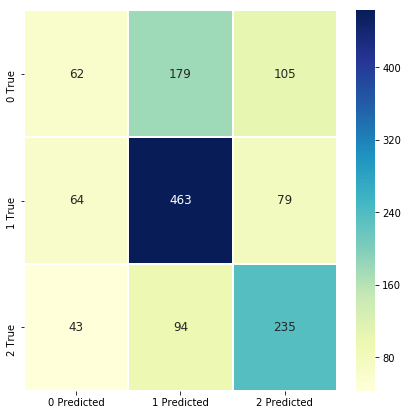

In [19]:
from sklearn.metrics import confusion_matrix

confuse = confusion_matrix(val_y, ls_preds)
confuse = pd.DataFrame(confuse)
figure(num=None, figsize=(7, 7))
sns.heatmap(confuse, linewidths=1,annot=True, fmt='.5g', annot_kws={"size": 12},cmap="YlGnBu", 
            yticklabels=['0 True','1 True','2 True'], xticklabels=['0 Predicted','1 Predicted','2 Predicted'])

The above model is my final model. I had some other models that were more accurate but this model did a better job of catching True negitives. through feature engineering, hyperparameter tuning, and feature selection I was able to get slightly higher accuracy in other models but each of them wouldn't predict a 0 state (which remember meant that neither group was profitable to market to).

# Accuracy
This model is only 56% accurate. The model had to detect one of 3 distinct outcomes, if each of those outcomes were equally likely then deciding at random would give us an accuracy of 33%. Since group one being more profitable is the most common outcome, a model can be 46% accurate just by always predicting target to be 1. 

Below there are several other models hidden, which had decent enough performance to be worth a look, feel free to unhide them if your curious. The other visible model below is the one I initially set forth to test out, the Stacked Classifier, but I'm not hugely thrilled with its performance.

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=90, random_state=0)
etc.fit(train_X, train_y)
ls_preds = etc.predict(val_X)
print('Score of Etremely Random Forest: ', accuracy_score(val_y, ls_preds))

Score of Etremely Random Forest:  0.5649546827794562


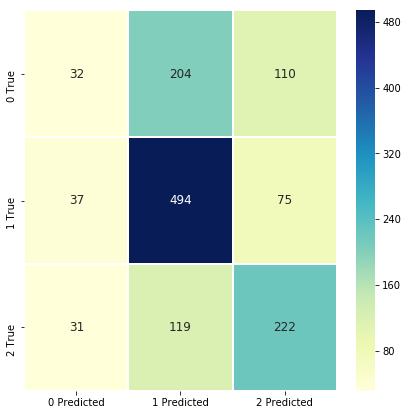

In [21]:
from sklearn.metrics import confusion_matrix

confuse = confusion_matrix(val_y, ls_preds)
confuse = pd.DataFrame(confuse)
figure(num=None, figsize=(7, 7))
sns.heatmap(confuse, linewidths=1,annot=True, fmt='.5g', annot_kws={"size": 12},cmap="YlGnBu", 
            yticklabels=['0 True','1 True','2 True'], xticklabels=['0 Predicted','1 Predicted','2 Predicted'])


In [22]:
from sklearn.ensemble import BaggingClassifier
baggin = BaggingClassifier(n_estimators=90)
baggin.fit(train_X, train_y)
ls_preds = baggin.predict(val_X)
print('Score of Histogram-based Gradient Boosting Regression Tree: ', accuracy_score(val_y, ls_preds))

Score of Histogram-based Gradient Boosting Regression Tree:  0.5664652567975831


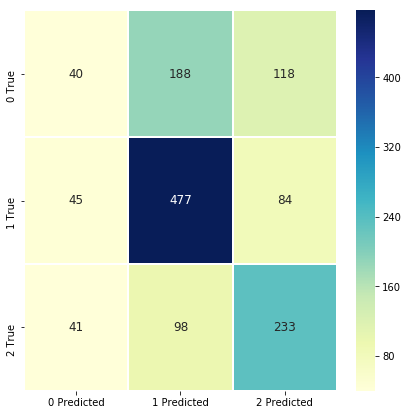

In [23]:
confuse = confusion_matrix(val_y, ls_preds)
confuse = pd.DataFrame(confuse)
figure(num=None, figsize=(7, 7))
sns.heatmap(confuse, linewidths=1,annot=True, fmt='.5g', annot_kws={"size": 12},cmap="YlGnBu", 
            yticklabels=['0 True','1 True','2 True'], xticklabels=['0 Predicted','1 Predicted','2 Predicted'])

In [24]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

estimators = [
    ('rf', ExtraTreesClassifier(n_estimators=90, random_state=0)),
    ('hgb', RandomForestClassifier(n_estimators=40)),
    ('ada', HistGradientBoostingClassifier()),
    ('bag', BaggingClassifier(n_estimators=70))
    ]
clf = StackingClassifier(estimators=estimators, final_estimator=AdaBoostClassifier(n_estimators=40))
clf.fit(train_X, train_y)
ls_preds = clf.predict(val_X)
print('Score of stacked: ', accuracy_score(val_y, ls_preds))

Score of stacked:  0.5808157099697885


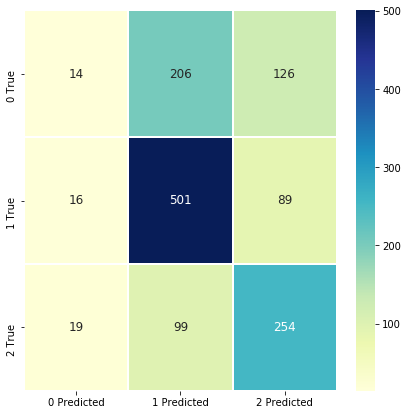

In [25]:
confuse = confusion_matrix(val_y, ls_preds)
confuse = pd.DataFrame(confuse)
figure(num=None, figsize=(7, 7))
sns.heatmap(confuse, linewidths=1,annot=True, fmt='.5g', annot_kws={"size": 12},cmap="YlGnBu", 
            yticklabels=['0 True','1 True','2 True'], xticklabels=['0 Predicted','1 Predicted','2 Predicted'])

# Final Thoughts:

I set out to try out the StackingClassifier and I can say I was successful with that. There is still room for improvement in the model, and I imagine more signal to tease out of the dataset. I look forward to see what others try with this task, I'm really curious what I may not have found. 

Each of the models that I created did rather poorly at predicting an outcome of 0 (where neither group was profitable). One possibility that I did not explore was the option of training a seperate model (probably a decision tree) and tune it to just detect 0 or not 0 outcome. Including such model in the stack could have been useful.

I'll also acknowledge that I'm not overly experienced with model stacking/blending so I may have overlooked some better model designs. 

Currently I'm challenging myself to complete one Kaggle Task per week. If you have any constructive feedback or want to collaborate with me on a future task feel free to message me or leave a comment on this notebook.

As always upvotes are appreciated.